# [Swin2SR: SwinV2 Transformer for Compressed Image Super-Resolution and Restoration](https://arxiv.org/abs/2209.11345)
## Official demo 🚀🚀🔥

<br>

**We are looking for collaborators!  Collaborator를 찾고 있습니다!** 🇬🇧 🇪🇸 🇰🇷 🇫🇷 🇷🇴 🇩🇪 🇨🇳

**Please check our github project: https://github.com/mv-lab/swin2sr**

------------------

Our model achieves state-of-the-art performance in:

- classical, lighweight and real-world image super-resolution (SR)
- color JPEG compression artifact reduction
- compressed input super-resolution: top solution at the "[AIM 2022 Challenge on Super-Resolution of Compressed Image and Video](https://codalab.lisn.upsaclay.fr/competitions/5076)"


<p align="center">
  <a href="https://github.com/mv-lab/swin2sr"><img src="https://github.com/mv-lab/swin2sr/raw/main/media/sr-teaser-2.png" alt="swin2sr-teaser1" width="800" border="0"></a>
</p>

<p align="center">
  <a href="https://github.com/mv-lab/swin2sr"><img src="https://github.com/mv-lab/swin2sr/raw/main/media/sr-teaser-1.png" alt="swin2sr-teaser2" width="800" border="0"></a>
</p>


In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
! pip -q install timm
! git clone https://github.com/mv-lab/swin2sr.git

Cloning into 'swin2sr'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 180 (delta 18), reused 16 (delta 11), pack-reused 148
Receiving objects: 100% (180/180), 20.54 MiB | 7.07 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

os.chdir("./swin2sr")

In [4]:
def load_img (filename, debug=False, norm=True, resize=None):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if norm:
        img = img / 255.
        img = img.astype(np.float32)
    if debug:
        print (img.shape, img.dtype, img.min(), img.max())

    if resize:
        img = cv2.resize(img, (resize[0], resize[1]))

    return img

def plot_all (images, axis='off', figsize=(16, 8)):

    fig = plt.figure(figsize=figsize, dpi=80)
    nplots = len(images)
    for i in range(nplots):
        plt.subplot(1,nplots,i+1)
        plt.axis(axis)
        plt.imshow(images[i])
    plt.show()

## Test Compressed Image Super-Resolution (SR) X4

1. create a folder `inputs` and put there the input images. The model expects low-quality and low-resolution JPEG compressed images.

2. select `--scale` standard is 4, this means we will increase the resolution of the image x4 times. For example for a 1MP image (1000x1000) we will upscale it to near 4K (4000x4000).

3. run our model using `main_test_swin2sr.py` and `--save_img_only`. The pre-trained models are included in [our repo](https://github.com/mv-lab/swin2sr), you can download them from [here](https://github.com/mv-lab/swin2sr/releases) or check the repo [releases](https://github.com/mv-lab/swin2sr/releases). It is important to select the proper `--task`, by default we do compressed input super-resolution `compressed_s`.

4. we process the images in `inputs/` and the outputs are stored in `results/swin2sr_{TASK}_x{SCALE}` where TASK and SCALE are the selected options. You can just navigate through `results/`

You can find more details about the code in our repo **https://github.com/mv-lab/swin2sr**

In [5]:
# Clean and create the inputs/ directory from scratch

!rm -r inputs
!mkdir inputs

# Put some images into inputs/
!cp testsets/real-inputs/* inputs/

# check the images in input/
!ls inputs

rm: inputs: No such file or directory
ali_eye.jpg    gojou-eyes.jpg shanghai.jpg
chain-eye.jpg  seoul.jpg      vagabond.jpg


In [6]:
! python main_test_swin2sr.py --task compressed_sr --scale 4 --training_patch_size 48 --model_path model_zoo/swin2sr/Swin2SR_CompressedSR_X4_48.pth --folder_lq ./inputs/ --save_img_only

downloading model model_zoo/swin2sr/Swin2SR_CompressedSR_X4_48.pth
/Users/macbook/miniforge3/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Users/macbook/Desktop/Machine-Learning-X/swin2sr/main_test_swin2sr.py:187: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unp

In [7]:
!ls results
!ls results/swin2sr_compressed_sr_x4

swin2sr_compressed_sr_x4


Processing ./inputs/ali_eye.jpg. Upscaling resolution from (360, 640, 3) to (1440, 2560, 3)


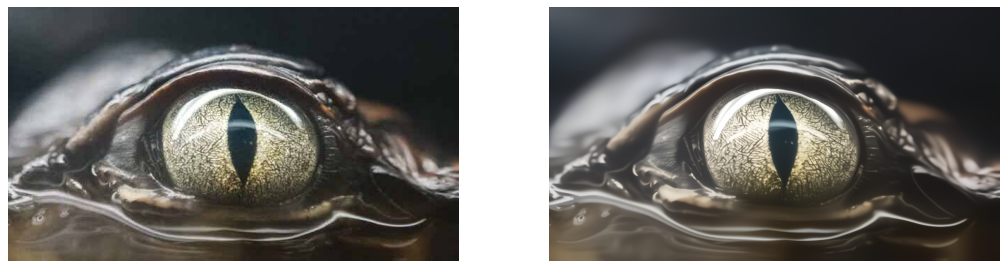

Processing ./inputs/chain-eye.jpg. Upscaling resolution from (245, 239, 3) to (980, 956, 3)


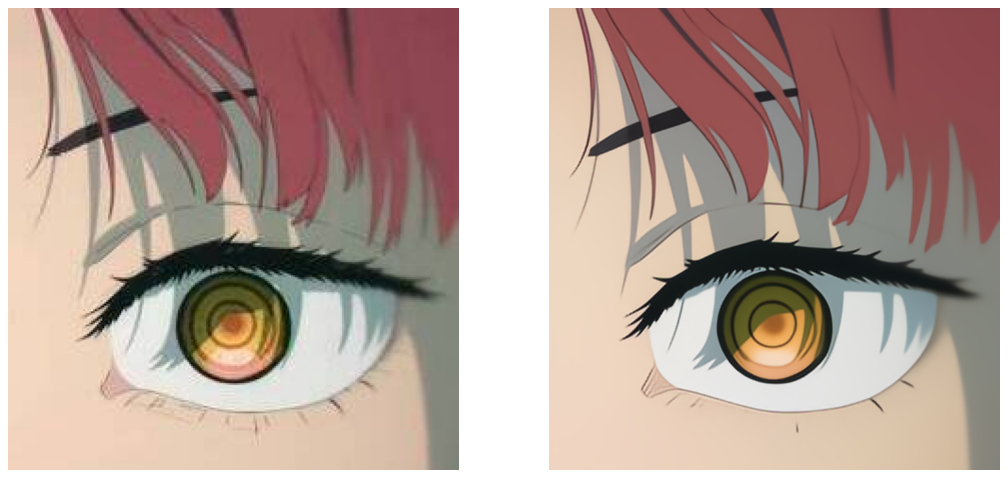

Processing ./inputs/gojou-eyes.jpg. Upscaling resolution from (103, 188, 3) to (412, 752, 3)


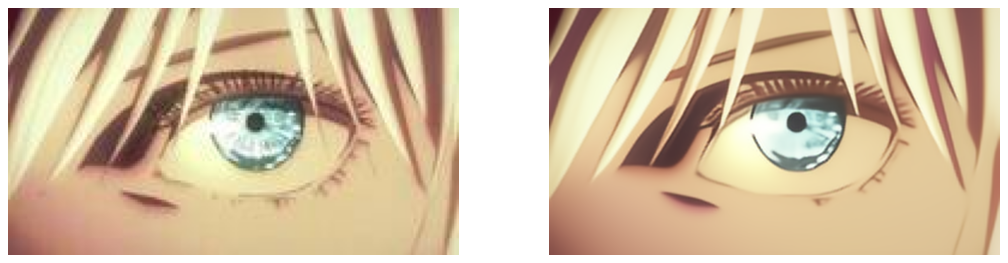

Processing ./inputs/seoul.jpg. Upscaling resolution from (384, 683, 3) to (1536, 2732, 3)


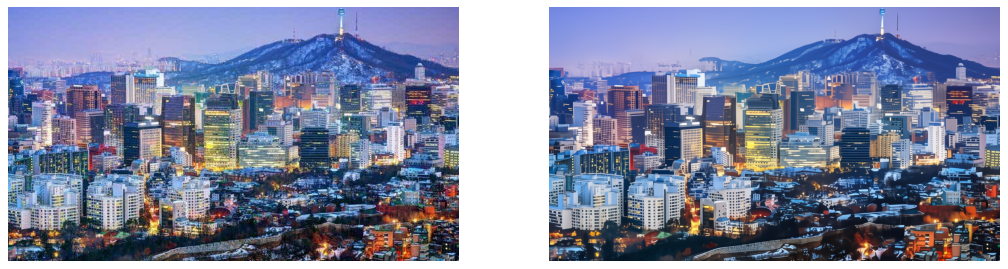

Processing ./inputs/shanghai.jpg. Upscaling resolution from (339, 510, 3) to (1356, 2040, 3)


In [ ]:
inputs  = sorted(glob('./inputs/*'))
outputs = sorted(glob('./results/swin2sr_compressed_sr_x4/*')) # the path to the folder above

for input_img_path, output_img_path in zip(inputs, outputs):

    img_input  = load_img(input_img_path)
    img_output = load_img(output_img_path)

    print (f'Processing {input_img_path}. Upscaling resolution from {img_input.shape} to {img_output.shape}')
    plot_all([img_input, img_output])

### This is it! Please support our project [Swin2SR](https://github.com/mv-lab/swin2s)


**We are looking for collaborators!  Collaborator를 찾고 있습니다!** 🇬🇧 🇪🇸 🇰🇷 🇫🇷 🇷🇴 🇩🇪 🇨🇳

**Please check our github project: https://github.com/mv-lab/swin2sr**

